In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pickle import load
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime

from eoles.write_output import get_total_system_costs, comparison_simulations_new, plot_typical_week, plot_typical_demand, plot_residual_demand, colormap_simulations
from pathlib import Path
from project.write_output import plot_compare_scenarios

# New comparisons

In [7]:
scenarios = pd.read_csv(Path('eoles') / Path('inputs') / Path('xps') / Path('20240220') / Path('scenarios.csv'), index_col=0)

In [8]:
scenarios

,biogas,capacity,policy,learning,elasticity
S0,reference,reference,Ban,reference,reference
S1,reference,reference,Ban,reference,Elasticity-
S2,reference,reference,Ban,Learning+,reference
S3,reference,reference,Ban,Learning+,Elasticity-
S4,reference,reference,BanNoPolicy,reference,reference
...,...,...,...,...,...
S91,Biogas-,Ren-,Package2024,Learning+,Elasticity-
S92,Biogas-,Ren-,NoPolicy,reference,reference
S93,Biogas-,Ren-,NoPolicy,reference,Elasticity-
S94,Biogas-,Ren-,NoPolicy,Learning+,reference


In [13]:
scenarios_complete = pd.concat([scenarios, total_system_costs.T], axis=1)
scenarios_complete.to_csv(Path('eoles') / Path('outputs') / Path('20240220') / Path('scenarios_complete.csv'))

In [2]:
dict_output = {}
# list all files in a folder with path folderpath 
folderpath = Path('eoles') / Path('outputs') / Path('20240220')
for path in folderpath.iterdir():
    if path.is_dir():
        dict_output[path.name.split('_')[1]] = path

total_system_costs = get_total_system_costs(dict_output)

In [3]:
total_system_costs

,S83,S33,S80,S17,S0,S34,S50,S35,S66,S24,...,S10,S1,S49,S2,S64,S82,S16,S26,S3,S51
Investment electricity costs,230.926338,215.517184,232.183537,215.142325,215.875078,219.082921,226.999589,216.450285,241.071848,236.249259,...,222.583554,214.467580,222.329342,217.826514,237.400299,236.569000,216.142898,232.993490,215.273806,223.307076
Investment heater costs,297.876804,327.279834,351.348276,327.275927,351.315509,313.762523,313.759957,297.858483,313.764848,324.594253,...,302.795708,327.269996,327.292482,313.751217,351.336025,313.772283,351.323429,302.799459,297.851525,297.868713
Investment insulation costs,174.470160,175.901691,169.676149,175.903652,169.644474,166.850186,166.859928,174.432742,166.866577,171.060400,...,169.178278,175.890095,175.928079,166.841477,169.671315,166.869685,169.654196,169.181926,174.424021,174.458624
Functionment costs,602.927274,607.317099,598.926978,608.319147,596.506217,588.298650,585.331868,602.768679,590.674509,610.892877,...,600.678860,605.578036,604.907213,586.411244,600.546430,589.282610,599.922930,604.001506,601.053950,600.343677
Health costs,100.123885,102.935375,85.988720,102.938036,86.015425,81.905017,81.906830,100.160286,81.901962,78.002565,...,76.700380,102.949936,102.911759,81.915820,85.998201,81.895044,86.008798,76.696719,100.172080,100.138136
Total costs,1406.324462,1428.951183,1438.123662,1429.579087,1419.356702,1369.899296,1374.858173,1391.670475,1394.279744,1420.799354,...,1371.936781,1426.155643,1433.368875,1366.746273,1444.952271,1388.388623,1423.052251,1385.673099,1388.775383,1396.116226


In [6]:
total_system_costs.shape 

(6, 30)

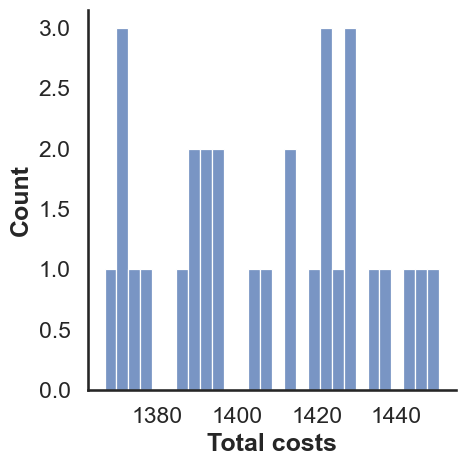

In [5]:
sns.displot(total_system_costs.T, x="Total costs", binwidth=3)

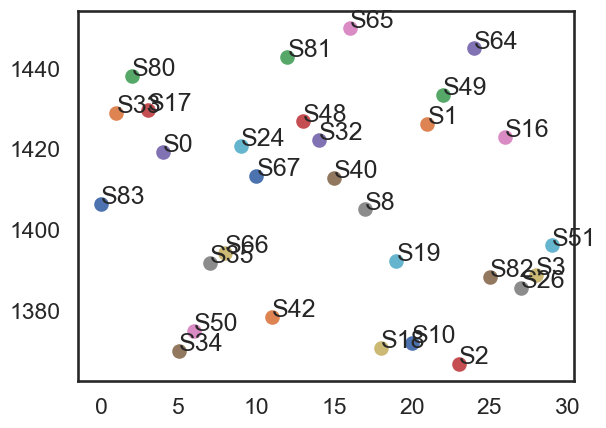

In [4]:
# plot on a graph the index 'Total costs' from total_system_costs
# the plot should only be
# annotate each point with the name of the column
fig, ax = plt.subplots()
for i, col in enumerate(total_system_costs.columns):
    ax.scatter(i, total_system_costs.loc['Total costs', col])
    ax.annotate(col, (i, total_system_costs.loc['Total costs', col]))
plt.show()

# Comparison policy scenarios costs

AttributeError: 'NoneType' object has no attribute 'loc'

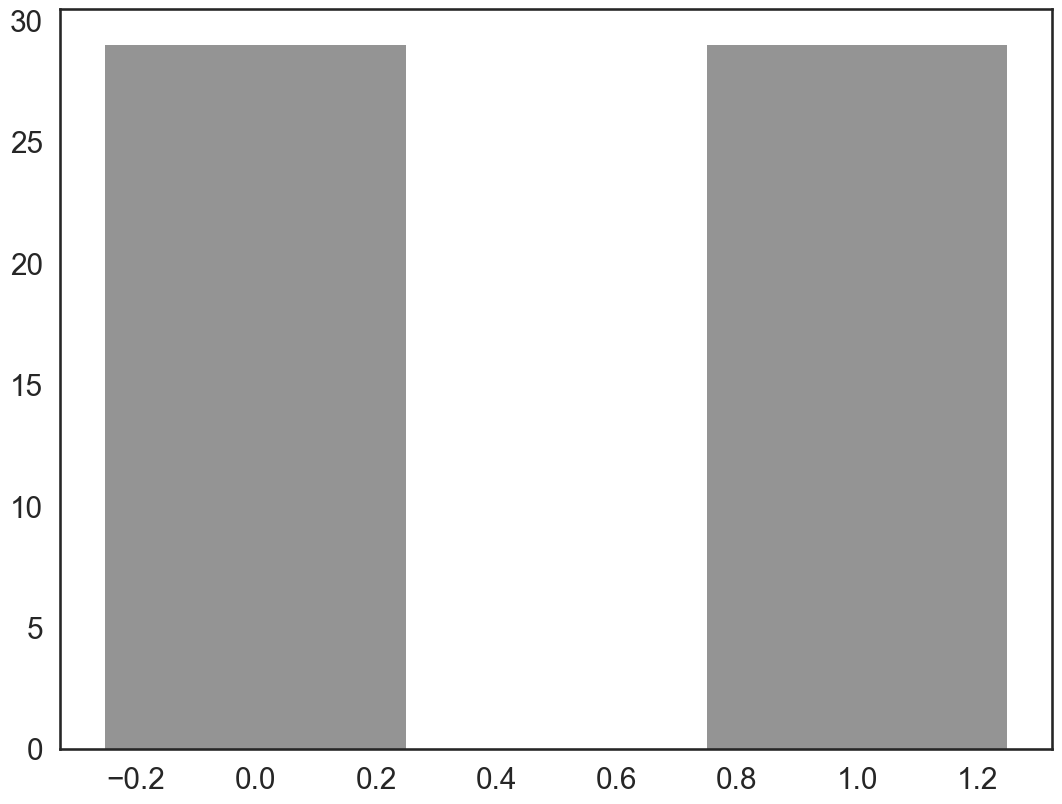

In [3]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=1.3)
dict_output = {
     # '': {
     #    "Ambitious": os.path.join("eoles/outputs/20231210/1211010909_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyambitious"),
     #    "Ban": os.path.join("eoles/outputs/20231210/1211004148_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyban"),
     #    "Ban no policy": os.path.join("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy"),
     #     "Ban ref": os.path.join("eoles/outputs/20231210/1211010852_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybanref"),
     #   # "Carbon tax": os.path.join("eoles/outputs/20231210/1211012604_biogasS3_capacityN1_demandReindustrialisation_profileReference_policycarbontax"),
     #    # "Reference": os.path.join("eoles/outputs/20231210/1211010746_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyreference"),
     # },
         '': {
        "Ambitious": os.path.join("eoles/outputs/20231210/1211004316_biogasS3_capacityN1_demandReference_profileReference_policyambitious"),
        "Ban": os.path.join("eoles/outputs/20231210/1210235222_biogasS3_capacityN1_demandReference_profileReference_policyban"),
        "Ban no policy": os.path.join("eoles/outputs/20231210/1210235104_biogasS3_capacityN1_demandReference_profileReference_policybannopolicy"),
         "Ban ref": os.path.join("eoles/outputs/20231210/1211001733_biogasS3_capacityN1_demandReference_profileReference_policybanref"),
        "Carbon tax": os.path.join("eoles/outputs/20231210/1211010310_biogasS3_capacityN1_demandReference_profileReference_policycarbontax"),
        "Reference": os.path.join("eoles/outputs/20231210/1211004541_biogasS3_capacityN1_demandReference_profileReference_policyreference"),
     },
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"].rename(columns={2049:2050})

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/122023_ban")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False, secondary_y='Proportional',
    secondary_axis_spec={'y_min': 0, 'y_max': 120, 'title': 'Subsidies (€/TWh)'}, waterfall=True)

# # # Plots ResIRF
# # # Problem to solve
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True, reference=" Reference")

# Sensitivity analysis

In [4]:
total_system_costs_2050_df = colormap_simulations(overall_folder=Path('eoles') / Path('outputs') / Path('20231211'),
                                                  config_ref=None,
                                                  save_path=Path('eoles') / Path('outputs') / Path('20231211'),
                                                  subset_configs=['Ban', 'BanRef', 'BanNoPolicy'],
                                                  percent=True,
                                                  reorder=['BanRef', 'BanNoPolicy'],
                                                  dict_scenario={
                                                      'BanRef': 'Package 2021 + Ban',
                                                      'BanNoPolicy': 'No Policy + Ban'
                                                  },
                                                  dict_config_demandsupply={
                                                      'Elasticity-': 'Lower Elasticity HP',
                                                      'LearningHP+': 'Technical Progress HP',
                                                      'biogasBiogas-': 'Lower Biogas Potential',
                                                      'capaNuc-': 'Lower Nuclear Potential',
                                                      'capaRen-': 'Lower Renewable Potential',
                                                      'capaRen+': 'Higher Renewable Potential',
                                                      'costscostsREN+': 'Higher Renewable Costs',
                                                      'demandReindustrialisation': 'Higher Electricity Demand',
                                                      'demandSobriete': 'Lower Electricity Demand',
                                                      'weather2012': 'Colder Weather'
                                                  }
                                                    )

# Hourly balance

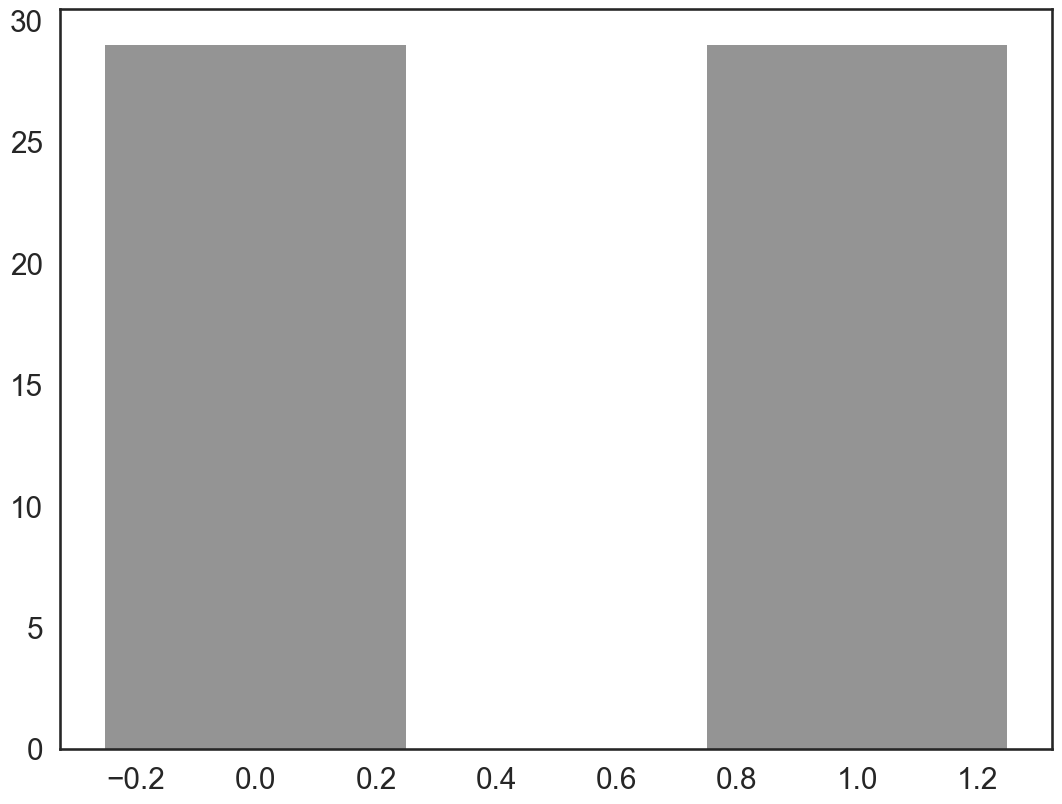

In [35]:
sns.set_theme(context="talk", style="white")

hourly_generation = pd.read_csv("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 2, 7, 0, 0), datetime.datetime(2006, 2, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [2]:
date_start, date_end = datetime.datetime(2006, 6, 7, 0, 0), datetime.datetime(2006, 6, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [29]:
hourly_generation.loc[(hourly_generation.hydrogen_in > 0) & (hourly_generation.hydrogen > 0)]

In [30]:
hourly_generation.hydrogen_charge.plot()

count    8760.000000
mean        4.584872
std         2.991499
min         0.000000
25%         4.212162
50%         4.566210
75%         6.055786
max         8.953740
Name: electrolysis, dtype: float64

In [31]:
hourly_generation.hydrogen.iloc[0:1000].plot()

In [34]:
begin, end = 4000, 4050
hourly_generation.hydrogen_in.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.hydrogen.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.electrolysis.iloc[begin:end].plot(c='black', label='electrolysis')
hourly_generation.H2_demand.iloc[begin:end].plot(c='red')

0       28.181125
1       29.091650
2       29.437800
3       29.430275
4       29.106700
          ...    
8755    24.034850
8756    24.080000
8757    23.929500
8758    23.666125
8759    23.417800
Name: offshore_f, Length: 8760, dtype: float64

In [6]:
hourly_generation.hydrogen_in.describe()